## Specialty Score Project Part 3 ##
### CSCI 4831 Sabermetrics ###
### Jacob Hallberg and Lindsay Walton ###

In sabermetrics, there are a variety of statistics used to evaluate the skill of a batter. Statistics such as batting average, slugging, on-base percentage, strikeouts, and other similar statistics evaluate the overall skill of a batter. None of these statistics consider a batter’s ability to hit varying types of pitches, just the batter’s ability to hit pitches as a whole. Some pitchers may be able to effectively hit all types of pitches, while others may only be able to be effective pitchers for fastballs. The Speciality Score statistic aims to gauge a batter’s ability to hit "speciality" pitches such as curveballs, sliders, changeups, and so on. Batters with high batting skill for these speciality pitches will have a high speciality score while batter with less skill for these pitches will have a lower speciality score. 

This statistic could be used to identify batters with a unique batting skill as compared to other batters. A team manager could use this information to ensure that the team is well-balanced in terms of batting ability: a team needs batters that are able to excel against specialty pitches. Pitchers could also benefit from this information by using against batters with low specialty scores. If a pitcher is going to pitch to a batter who has a low specialty score, then he can throw specialty pitches to the batter. 

The statistic is presented with a website: http://specialtyscore.herokuapp.com/. A user can access the website and read some information about the statistic and how it is calculated. A user can enter a Major League Baseball player’s name and see his Specialty Score. The Specialty Scores will be available for all players that have enough Statcast data for which we can calculate their score.

### Explanation of the Specialty Score ###
TODO Jacob's stuff

### Evaluation of the Specialty Score ###

We can evaluate the Specialty Score statistic by comparing it to other batting statistics. We will compare it to OBP, RBI, OBP, SLG, HR, BA, and WAR. For these statistics, we will perform a linear regression and plot the results. We can then visually see if there are any correlations. 

In [1]:
# Import necessary modules
from pybaseball.lahman import *
import pandas as pd
import pybaseball
import matplotlib.pylab as plt
%matplotlib inline
from scipy import stats
from pybaseball import batting_stats
import statsmodels.api as sm 

In [2]:
# Read in all necessary data
data = pd.read_csv("specialty_data.csv")
data['full_name'] = data['name_first'].str.capitalize() + ' ' + data['name_last'].str.capitalize()
batters = batting_stats(2014, end_season=2018, league='all', qual=200, ind=1)
all_data = pd.merge(data, batters, how='inner', left_on=['full_name', 'game_year'], right_on=['Name', 'Season'])
all_data['BA'] = all_data['H'] / all_data['AB']

#### Specialty Score vs. OBP ####

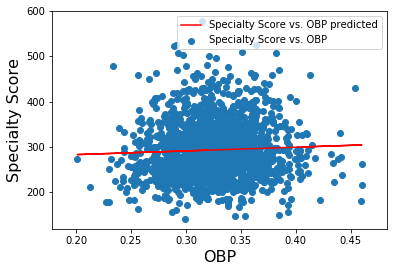

In [3]:
m, b, rval, pval, stderr = stats.linregress(all_data['OBP'], all_data['speciality_score'])
y = m * all_data['OBP'].copy() + b
x = all_data['OBP'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x, all_data['speciality_score'],marker='o',label="Specialty Score vs. OBP")
line = ax.plot(x,y, color='red',label="Specialty Score vs. OBP predicted")
ax.set_xlabel("OBP", fontsize=16)
ax.set_ylabel("Specialty Score", fontsize=16)
plt.legend()

#### Specialty Score vs. RBI ####

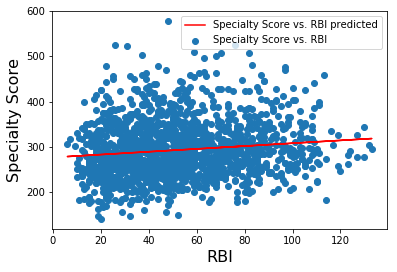

In [4]:
m, b, rval, pval, stderr = stats.linregress(all_data['RBI'], all_data['speciality_score'])
y = m * all_data['RBI'].copy() + b
x = all_data['RBI'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x, all_data['speciality_score'],marker='o',label="Specialty Score vs. RBI")
line = ax.plot(x,y, color='red',label="Specialty Score vs. RBI predicted")
ax.set_xlabel("RBI", fontsize=16)
ax.set_ylabel("Specialty Score", fontsize=16)
plt.legend()

#### Specialty Score vs. SLG ####

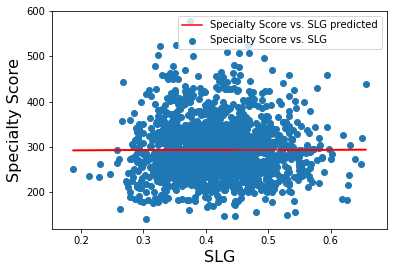

In [32]:
m, b, rval, pval, stderr = stats.linregress(all_data['SLG'], all_data['speciality_score'])
y = m * all_data['SLG'].copy() + b
x = all_data['SLG'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x, all_data['speciality_score'],marker='o',label="Specialty Score vs. SLG")
line = ax.plot(x,y, color='red',label="Specialty Score vs. SLG predicted")
ax.set_xlabel("SLG", fontsize=16)
ax.set_ylabel("Specialty Score", fontsize=16)
plt.legend()

#### Specialty Score vs. OPS ####

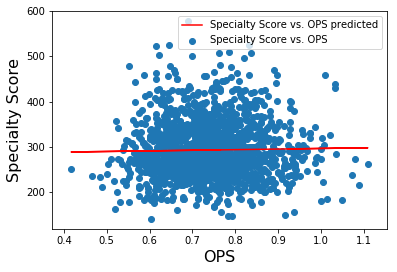

In [33]:
m, b, rval, pval, stderr = stats.linregress(all_data['OPS'], all_data['speciality_score'])
y = m * all_data['OPS'].copy() + b
x = all_data['OPS'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x, all_data['speciality_score'],marker='o',label="Specialty Score vs. OPS")
line = ax.plot(x,y, color='red',label="Specialty Score vs. OPS predicted")
ax.set_xlabel("OPS", fontsize=16)
ax.set_ylabel("Specialty Score", fontsize=16)
plt.legend()

#### Specialty Score vs. HR ####

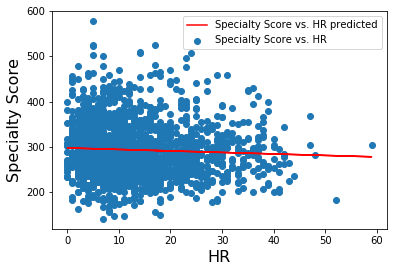

In [34]:
m, b, rval, pval, stderr = stats.linregress(all_data['HR'], all_data['speciality_score'])
y = m * all_data['HR'].copy() + b
x = all_data['HR'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x, all_data['speciality_score'],marker='o',label="Specialty Score vs. HR")
line = ax.plot(x,y, color='red',label="Specialty Score vs. HR predicted")
ax.set_xlabel("HR", fontsize=16)
ax.set_ylabel("Specialty Score", fontsize=16)
plt.legend()

#### Specialty Score vs. BA ####

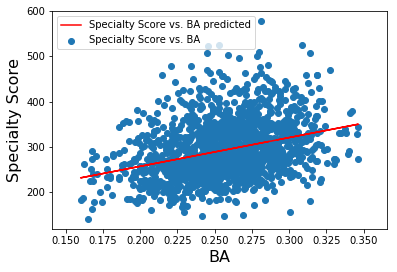

In [36]:
m, b, rval, pval, stderr = stats.linregress(all_data['BA'], all_data['speciality_score'])
y = m * all_data['BA'].copy() + b
x = all_data['BA'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x, all_data['speciality_score'],marker='o',label="Specialty Score vs. BA")
line = ax.plot(x,y, color='red',label="Specialty Score vs. BA predicted")
ax.set_xlabel("BA", fontsize=16)
ax.set_ylabel("Specialty Score", fontsize=16)
plt.legend()

#### Specialty Score vs. WAR ####

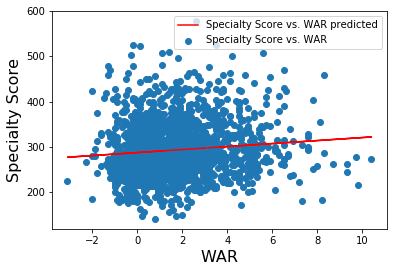

In [40]:
m, b, rval, pval, stderr = stats.linregress(all_data['WAR'], all_data['speciality_score'])
y = m * all_data['WAR'].copy() + b
x = all_data['WAR'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x, all_data['speciality_score'],marker='o',label="Specialty Score vs. WAR")
line = ax.plot(x,y, color='red',label="Specialty Score vs. WAR predicted")
ax.set_xlabel("WAR", fontsize=16)
ax.set_ylabel("Specialty Score", fontsize=16)
plt.legend()

#### Taking a Closer Look ####

As we can see from the linear regressions graphed above, Specialty Score has a positive correlation with most batting statistics (all but HR). Batting average and Wins Above Replacement appear to have the highest correlation to Specialty Score. How much are theses values correlated? We can calculate the R-squared values to determine this. First we'll use a multiple regression model to determine how much BA and WAR together correlate with Specialty Score. 

In [8]:
# Collect the features in a 2D array 
X = all_data[["BA", "WAR"]]
# Add a constant to the array for the intercept
#You need a good reason if you don't have an intercept
X = sm.add_constant(X)

# The dependent variable is wins, put in an array 
y = all_data['speciality_score']

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

#How good is the fit?
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       speciality_score   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 01 May 2019   Prob (F-statistic):           6.47e-46
Time:                        00:22:56   Log-Likelihood:                -8868.6
No. Observations:                1619   AIC:                         1.774e+04
Df Residuals:                    1616   BIC:                         1.776e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.7686     14.022      6.402      0.0

Batting Average seems to have the highest correlation with Specialty Score out of all of the above statistics. We can calculate the R-squared value to see how much it correlates. 

In [10]:
# Collect the features in a 2D array 
X = all_data["BA"]
# Add a constant to the array for the intercept
#You need a good reason if you don't have an intercept
X = sm.add_constant(X)

# The dependent variable is wins, put in an array 
y = all_data['speciality_score']

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

#How good is the fit?
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       speciality_score   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     190.5
Date:                Wed, 01 May 2019   Prob (F-statistic):           4.86e-41
Time:                        00:53:05   Log-Likelihood:                -8882.7
No. Observations:                1619   AIC:                         1.777e+04
Df Residuals:                    1617   BIC:                         1.778e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.0387     11.912     10.916      0.0

BA and WAR together had an R-squared value of 0.121. This means that these statistics can only account for 12.1% of the correlation with Specialty Score. BA alone had an R-squared value of 0.105, which means that BA can only account for 10.5% of the correlation with Specialty Score. Neither one of these statistics correlate well with Specialty Score. 

This lack of similarity to other batting statistics is to be expected. All of the batting statistics shown above test a batter's general batting skill: ability to hit home runs, ability to make contact with the bat regularly, ability to get on-base, and so on. None of these statistics test a batter's skill in niche situations such as different batting scenarios or different types of pitches. The only other "niche" batting statistic is Clutch which tests a batter's ability to perform well in high-leverage situations. This situation was deemed so different from the Specialty Score's test of different pitches that it wasn't considered meaningful to compare the two statistics. The effectiveness of the Specialty Score statistic cannot be determined by comparing it to other statistics because it isn't like other statistics. The goal of creating the Specialty Score was to fill this void in the batting skills: cover a situation that isn't covered by other statistics. 